<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Histograma_Final/PSD_histogram_final_amostra_08_set_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 11.4 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 203.28 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (219/219), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[9] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     110   64.383797   64.875694  ...   90.766937   93.777184   93.352066
1     143   90.485153   90.230965  ...   63.545158   56.168808   44.303780
2     107   39.529827   18.400124  ...   43.338982   17.656301    4.504062
3     178   33.783241   16.141775  ...   77.305893   83.510674   86.715073
4     146   12.698817   35.434040  ...   59.528240   68.356911   69.110901
5     147   58.684807   60.807255  ...   97.002274   97.501137   93.623581
6     167   65.341286   66.689919  ...   68.813477   67.593468   69.703751
7     177  124.720001   84.219246  ...    1.785885    1.770404    1.965240
8     123   49.053078   53.893978  ...   41.104172   42.021614   41.980244
9     198   59.406685   54.396179  ...   63.030296   61.462200   63.969894
10    161   93.364838   99.240082  ...    7.086957    6.994329    6.347826
11    121  104.039963  106.268082  ...   75.218842   77.984909   78.759445
12    164   52.486019   4

In [12]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 8.70 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 142ms/step - loss: 0.4878 - accuracy: 0.7843 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 121ms/step - loss: 0.2035 - accuracy: 0.9155 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 122ms/step - loss: 0.1684 - accuracy: 0.9329 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 123ms/step - loss: 0.0873 - accuracy: 0.9708 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 123ms/step - loss: 0.0774 - accuracy: 0.9738 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 121ms/step - loss: 0.0851 - accuracy: 0.9621 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 121ms/step - loss: 0.0617 - accuracy: 0.9767 - val_loss: 0.6924 - val_accuracy: 0.5102

In [18]:
Y_test = yback(Y_test)

In [19]:
pred_test= model.predict(X_test)
Rows, Cols = pred_test.shape
Prediction =[]
for i in range(Rows):
  if(pred_test[0,0] > pred_test[0,1]):
    Prediction.append(0)
  else:
    Prediction.append(1)

In [20]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.51      1.00      0.68        75

    accuracy                           0.51       147
   macro avg       0.26      0.50      0.34       147
weighted avg       0.26      0.51      0.34       147



In [22]:
#pred_test

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[9] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction_02 = model.predict(result)
  Rows, Cols = prediction_02.shape
  Prediction =[]
  for i in range(Rows):
    if(prediction_02[0,0] > prediction_02[0,1]):
      Prediction.append(0)
    else:
      Prediction.append(1)
  loc_grao =[];k=0
  for i in Prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   175.0   90.908791   93.843201  ...   54.561592   56.212799   60.622395
1   113.0   93.945412   97.006584  ...   48.239250   47.497688   48.451878
2   128.0   97.116211   99.363281  ...   68.506836   69.538086   70.903320
3   113.0   55.317329   50.582584  ...   79.221161   77.526894   75.636223
4   103.0   44.139313   44.324627  ...   80.520966   83.156845   84.875954
5   126.0  100.098770  103.777786  ...   84.580246   84.407410   82.901230
6   103.0   75.207085   79.317368  ...   48.486191   50.137520   52.151291
7   118.0   61.940247   42.980747  ...   59.563911   65.319160   66.721054
8   144.0   80.584106   81.441360  ...   21.012346   11.175926    2.733025
9   193.0   78.870438   82.588287  ...   58.678005   61.540684   60.298397
10  115.0   54.232891   54.505249  ...   71.764153   65.775269   60.527782
11  139.0   37.910252   41.747738  ...   95.483040   95.530617   93.005676
12  127.0   72.716972   6

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 722, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (481/481), done.
remote: Total 722 (delta 308), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (722/722), 5.82 MiB | 7.22 MiB/s, done.
Resolving deltas: 100% (445/445), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  0.807
1           2  1.407
2           3  1.177


In [27]:
PSD_new.shape

(99, 2)

In [28]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [29]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,175.0,90.908791,93.843201,87.049591,82.111992,71.963196,52.600006,49.023994,58.559994,61.660797,61.891193,55.947197,55.956795,55.115196,55.246399,55.867195,57.316795,56.932796,56.225597,50.905598,45.350399,38.499195,31.497595,35.409599,70.299194,88.294403,94.291199,96.454384,99.321602,83.753601,83.449593,81.263992,72.319992,54.564796,48.308800,51.267197,61.289597,65.987198,65.327995,56.782394,...,73.195198,77.351997,75.272003,68.030396,55.169598,53.985596,51.535995,49.023994,50.427197,52.001595,54.782398,58.519993,89.854393,76.014397,40.254398,40.686398,47.793598,51.617596,54.555191,53.758396,56.627197,58.419193,61.401596,60.889595,59.639999,58.827194,58.691193,61.798401,70.737595,76.859192,79.156799,74.443192,63.838394,55.710396,52.275200,53.942398,54.011196,54.561592,56.212799,60.622395
1,113.0,93.945412,97.006584,97.523148,97.381866,98.850349,102.256554,106.305267,106.428841,102.839066,95.988411,90.580780,89.544830,86.848305,86.588776,87.055840,86.838905,85.449684,87.504189,89.785187,94.087006,97.058975,98.950272,97.276367,91.460876,65.584229,24.487038,27.346621,29.238859,92.132584,95.235741,96.116928,95.865387,97.365349,103.225632,109.107529,110.265495,105.716347,97.452904,91.881271,...,76.309418,77.273941,78.460411,81.508415,82.187958,72.030540,58.027645,48.216541,49.334721,50.602947,50.177464,50.759182,75.697235,75.063507,69.699966,65.795044,70.549454,75.687042,80.229065,82.518051,82.223671,81.758789,80.712906,80.110031,80.676407,81.210510,79.770851,78.357582,80.011826,80.686897,83.857224,88.855583,90.518600,83.773201,68.022316,50.682983,48.154831,48.239250,47.497688,48.451878
2,128.0,97.116211,99.363281,101.120117,103.237305,105.067383,107.893555,112.124023,112.666016,111.428711,108.452148,108.463867,111.670898,116.499023,119.522461,119.367188,115.756836,103.452148,84.054688,78.672852,82.488281,91.420898,99.040039,102.558594,103.543945,103.448242,104.626953,105.044922,106.189453,93.198242,97.667969,99.371094,101.927734,103.997070,107.600586,110.039062,110.556641,109.406250,107.149414,107.971680,...,75.171875,74.318359,75.764648,74.640625,70.477539,69.561523,68.022461,67.680664,68.113281,66.895508,64.541016,66.837891,69.626953,61.082031,64.163086,69.704102,68.667969,62.959961,57.387695,50.792969,43.843750,52.233398,69.923828,73.101562,75.121094,77.145508,75.133789,74.646484,73.572266,72.032227,69.437500,64.932617,68.591797,70.328125,68.709961,67.735352,70.108398,68.506836,69.538086,70.903320
3,113.0,55.317329,50.582584,40.319603,31.308245,31.285299,44.234940,56.308247,49.948311,39.828648,34.750881,36.108387,45.409508,67.635437,72.662315,76.263519,81.892479,88.524628,94.578667,83.537628,57.942669,50.040489,50.095623,51.504505,50.867023,48.694340,49.185844,51.109249,52.339729,51.660976,38.463234,29.579685,34.796227,48.913307,64.110893,67.814545,66.693550,63.517269,63.498009,65.109406,...,18.223980,19.114262,57.729187,79.645081,85.255699,85.751274,85.465034,86.755501,87.624008,86.560036,82.773201,79.917999,15.190069,27.460258,49.176914,64.606628,71.842201,69.585632,63.759106,62.019577,56.211060,45.090691,33.692146,27.762472,26.758478,28.575220,29.598244,30.757305,30.099930,27.752369,47.988724,76.606468,85.381790,89.653061,92.600433,94.179100,88.873131,79.221161,77.526894,75.636223
4,103.0,44.139313,44.324627,43.736637,44.789894,47.107738,49.484589,51.815910,52.250069,52.216419,52.491093,53.379677,53.997265,57.913280,63.175793,66.810539,65.993866,65.415497,59.901871,50.421623,40.165993,37.454517,43.620789,49.606464,50.404846,47.493729,45.068245,45.602695,45.392685,43.943066,44.550285,44.341595,44.922424,48.912056,49.968140,52.697613,53.767838,54.092190,53.878590,55.169476,...,81.607689,87.510979,87.992928,85.535957,85.633797,83.807045,80.808266,79.39

In [30]:
PSD_new.head()

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743


In [31]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [32]:
PSD_new

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743
...,...,...
94,28,2.097
95,29,1.871
96,30,1.315
97,31,1.034


In [33]:
PSD_new.iloc[:,1].values

array([0.807, 1.407, 1.177, 1.289, 1.743, 1.425, 2.553, 0.968, 1.43 ,
       0.722, 1.235, 1.058, 1.342, 1.207, 1.682, 1.474, 1.997, 1.187,
       2.082, 2.877, 1.386, 1.176, 0.96 , 1.147, 1.02 , 1.249, 1.704,
       1.602, 1.303, 1.707, 2.264, 1.233, 0.84 , 1.105, 1.343, 0.811,
       2.03 , 1.844, 2.266, 1.472, 1.009, 1.851, 0.941, 2.252, 1.269,
       1.082, 1.065, 1.995, 2.063, 0.969, 1.389, 1.721, 1.355, 1.178,
       1.529, 1.371, 1.423, 2.756, 0.854, 0.811, 0.69 , 1.752, 0.978,
       1.108, 1.149, 0.994, 1.594, 1.492, 1.322, 1.564, 1.29 , 1.057,
       1.193, 1.413, 1.477, 2.21 , 1.27 , 1.865, 1.088, 2.316, 1.855,
       0.882, 1.587, 1.075, 2.179, 1.749, 0.957, 1.24 , 1.586, 2.507,
       1.864, 1.281, 2.137, 1.282, 2.097, 1.871, 1.315, 1.034, 2.095])

In [34]:
X.shape

(490, 784)

In [35]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])

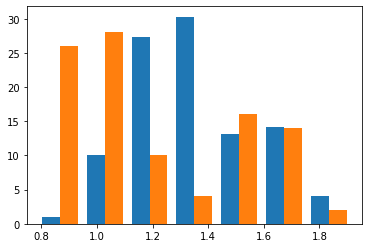

In [36]:
A = plt.hist(X,weights=wts,bins=7)

In [37]:
B = A[0][0]

In [38]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[1.0101010101010102, 10.101010101010102, 27.272727272727273, 30.303030303030305, 31.313131313131322]


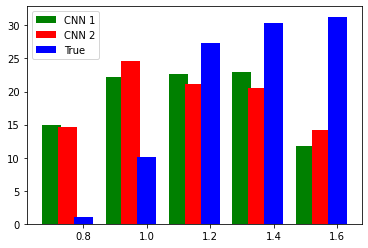

In [40]:
# Freq = [13.6, 24.8, 20.4, 24.8, 9.6, 0.] # average 4 
Freq = [13.6, 24.8, 20.4, 24.8, 9.6] # average 4 
Freq = [15, 22.2, 22.6, 23, 11.8] # average 10 
# Freq2 = [14.6, 24.6, 21.2, 20.6, 14., 0.2]
Freq2 = [14.6, 24.6, 21.2, 20.6, 14.2]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]
xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

In [ ]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

In [ ]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [ ]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [ ]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [ ]:
df

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

In [ ]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

In [ ]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [ ]:
yy[0][0]

In [ ]:
bins_list

In [ ]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [ ]:
df

In [ ]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)